<a href="https://colab.research.google.com/github/KieranJP/Machine-Learning-Code-Quality-Research/blob/master/Machine_Learning_Code_Quality_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enter Training/Test Data**



In [0]:
#Uploading Test Data
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# **Nerual Network**

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 54924 samples, validate on 13732 samples
Epoch 1/1000
54924/54924 [==============================] - 3s 59us/step - loss: 0.6161 - acc: 0.9480 - val_loss: 0.6004 - val_acc: 0.9493
Epoch 2/1000
54924/54924 [==============================] - 2s 41us/step - loss: 0.5418 - acc: 0.9477 - val_loss: 0.5237 - val_acc: 0.9490
Epoch 3/1000
54924/54924 [==============================] - 2s 43us/step - loss: 0.5126 - acc: 0.9471 - val_loss: 0.4854 - val_acc: 0.9493
Epoch 4/1000
54924/54924 [==============================] - 2s 40us/step - loss: 0.4472 - acc: 0.9488 - val_loss: 0.4175 - val_acc: 0.9492
Epoch 5/1000
54924/54924 [==============================] - 2s 38us/step - loss: 0.3960 - acc: 0.9487 - val_loss: 0.3761 - val_acc: 0.9454
Epoch 6/1000
54924/54924 [==============================] - 2s 40us/step - loss: 0.3419 - acc: 0.9484 - val_loss: 0.3202 - val_acc: 0.9

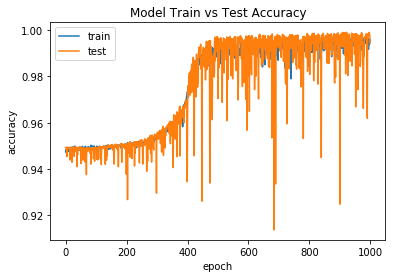

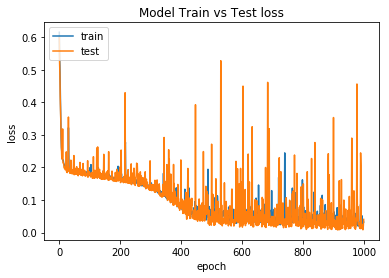

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import keras as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Imports Required
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#Selecting the Csv to use then Displaying it
import pandas as pd
dataset = pd.read_csv("FullELFFDataset.csv")
dataset.columns

#Using sklearn's split function to split the data into training and testing data.
from sklearn.model_selection import train_test_split

X = dataset.values
Y = dataset.Defective.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

X_gridtrain, X_gridtest, Y_gridtrain, Y_gridtest = train_test_split(X_train,Y_train, test_size=0.4)

#Creates a NN
model = Sequential()
#Input Layer
model.add(K.layers.Dense(units=40, input_dim=40, activation='relu', kernel_initializer='truncated_normal')) 
#Hidden Layers
model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal')) 
model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal'))
#Output Layers
model.add(K.layers.Dense(units=1, activation='sigmoid', kernel_initializer='truncated_normal'))

simple_sgd = K.optimizers.Adam(lr=0.00001)  
model.compile(loss='binary_crossentropy', optimizer=simple_sgd, metrics=['accuracy']) 

#Find out the size of each class so can change weighting
trueWeight = len(Y_train[Y_train==False])
falseWeight = len(Y_train[Y_train==True])

history = model.fit(X_train, Y_train, batch_size=128, epochs=1000, validation_split=0.2)

Y_predict = model.predict(X_test)
Y_predict =(Y_predict>0.5)
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Model Train vs Test Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Train vs Test loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()


In [0]:
#Test a set of data not seen before, and with no classification to emulate user input
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import pandas as pd  
userdata = pd.read_csv("TestUserDataTrue.csv")

userdata_X = userdata.values
userdata_y = userdata.Defective.values

Saving TestUserDataTrue.csv to TestUserDataTrue.csv
User uploaded file "TestUserDataTrue.csv" with length 386 bytes


In [0]:
user_predict = model.predict(userdata_X)
user_predict =(user_predict>0.5)
print(confusion_matrix(userdata_y, user_predict))
print(classification_report(userdata_y, user_predict))

NameError: ignored

#**Linear** Regression

In [0]:
#Selecting the Csv to use then Displaying it, may have to change the (3) when first ran
df = pd.read_csv("FullELFFDataset.csv")
df[0:10]

#Seperating the data into two sections, training and testing
X = df.drop(['Defective'], axis='columns')
y = df.Defective
#Split with a weighing of 70-30(0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Running the Regression Model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

#Run our Prediction of what the X_test should look like
clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix 

#Our accuracy percentage
#clf.score(X_test, y_test)

Y_predict = clf.predict(X_test)
Y_predict =(Y_predict>0.5)
print(confusion_matrix(y_test, Y_predict))
print(classification_report(y_test, Y_predict))

[[27947     6]
 [ 1300   171]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     27953
        True       0.97      0.12      0.21      1471

    accuracy                           0.96     29424
   macro avg       0.96      0.56      0.59     29424
weighted avg       0.96      0.96      0.94     29424



# **Support Vector Machine**

In [0]:
#Uploading Test Data
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BalancedELFF.csv to BalancedELFF.csv
User uploaded file "BalancedELFF.csv" with length 616292 bytes


In [0]:
#Imports
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#Selecting the Csv to use then Displaying it, may have to change the (3) when first ran.
import pandas as pd
df = pd.read_csv("BalancedELFF.csv")

#Setting up the dataframes so that ones with defects get placed in dataframe1 and ones without get placed in dataframe0.
df0 = df[df.Defective==False]
df1 = df[df.Defective==True]

#Dropping the classification so it can be predicted
X = df.drop(['Defective'], axis='columns')
Y = df.Defective

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
trueWeight = len(Y_train[Y_train==False])
falseWeight = len(Y_train[Y_train==True])

print("Y_train 'False' Length:", len(Y_train[Y_train==False]))
print("Y_train 'True' Length:", len(Y_train[Y_train==True]))

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import preprocessing
X = preprocessing.scale(X) 

model = SVC(kernel='linear', verbose=10)

#Training the Model using the fit method - Change these parameters to tune the model
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

Y_train 'False' Length: 2151
Y_train 'True' Length: 1065
[LibSVM][[428 106]
 [ 77 193]]
              precision    recall  f1-score   support

       False       0.85      0.80      0.82       534
        True       0.65      0.71      0.68       270

    accuracy                           0.77       804
   macro avg       0.75      0.76      0.75       804
weighted avg       0.78      0.77      0.78       804



In [0]:
Y_predict = model.predict(X_test)
cfm = confusion_matrix(Y_test, Y_predict)

print(cfm)
trueNeg = cfm[0,0]
falseNeg = cfm[1,0]
truePos = cfm[1,1]
falsePos = cfm[0,1]

#True Positive Rate
truePosRate = truePos/(truePos+falseNeg)
print("TruePos", truePosRate)

#True Negative Rate
trueNegRate = trueNeg/(trueNeg+falsePos)
print("TrueNeg", trueNegRate)

#Positive Prediciton Value - Pos Precision
posPreVal = truePos/(truePos+falsePos)
print("PosPrecision", posPreVal)

#Negative Prediciton Value - Neg Precision
negPreVal = trueNeg/(trueNeg+falseNeg)
print("NegPrecision", negPreVal)